## Conclusions:

- Ramicane had the greatest affect in reducing tumor growth between drugs. Ramicane is one of only two drugs that acheived an overall tumor reduction.

- Mice given Propriva were the least likely to survive the 45 days; these mice had a survival rate of 26%, which is 22% below the median.

- Ramicane maintained the fewest number of metastatic sites across the 45 days, ending with approximately 200% less than Mice treated with Ketapril.


In [1]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem

In [2]:
warnings.filterwarnings('ignore')

In [3]:
drug_data_path = "../data/mouse_drug_data.csv"
trial_data_path = "../data/clinicaltrial_data.csv"
drug_df = pd.read_csv(drug_data_path)
trials_df = pd.read_csv(trial_data_path)
mice_trials_df = pd.merge(trials_df, drug_df, on="Mouse ID")
drugs = [
    "Capomulin"
    , "Ceftamin"
    , "Infubinol"
    , "Ketapril"
    , "Naftisol"
    , "Placebo"
    , "Propriva"
    , "Ramicane"
    , "Stelasyn"
    , "Zoniferol"
]
linewidth = 0.3
marker = '^'

In [4]:
mice_trials_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [5]:
avg_tumor_volume = pd.DataFrame(
    {
        "Average Tumor Volume (mm3)": mice_trials_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
    }
).reset_index()

## Tumor Response to Treatment

In [6]:
avg_tumor_volume.head()

,Drug,Timepoint,Average Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mice_trials_by_drug_and_timepoint = mice_trials_df.groupby(["Drug", "Timepoint"])
tumor_volume_samples = [sample for sample in mice_trials_by_drug_and_timepoint["Tumor Volume (mm3)"]]

drug_samples = [sample[0][0] for sample in tumor_volume_samples]
timepoints = [sample[0][1] for sample in tumor_volume_samples]
means = [sample[1].mean() for sample in tumor_volume_samples]
sems = [sample[1].sem() for sample in tumor_volume_samples]

# Convert to DataFrame
standard_error = pd.DataFrame(
    {
        "Drug": drug_samples
        , "Timepoint": timepoints
        , "Tumor Volume (Standard Error)": sems
    }
)

In [8]:
standard_error.head()

,Drug,Timepoint,Tumor Volume (Standard Error)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_volume_pivot = pd.pivot_table(
    avg_tumor_volume
    , values="Average Tumor Volume (mm3)"
    , index="Timepoint"
    , columns="Drug"
)

In [10]:
# Preview that Reformatting worked
avg_tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


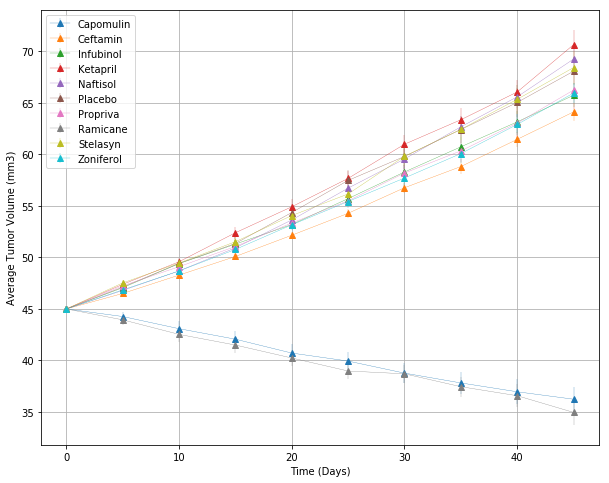

In [11]:
try:
    avg_tumor_volume.insert(3, "Tumor Volume (Standard Error)", sems)
except:
    print("The 'avg_tumor_volume' DataFrame already has a 'Standard Error' column.")

# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,8))

for drug in drugs:
    avg_tumor_volume_while_on_drug = avg_tumor_volume[avg_tumor_volume.Drug == drug]
    plt.errorbar(
        avg_tumor_volume_while_on_drug["Timepoint"]
        , avg_tumor_volume_while_on_drug["Average Tumor Volume (mm3)"]
        , yerr=avg_tumor_volume_while_on_drug["Tumor Volume (Standard Error)"]
        , linewidth=linewidth
        , marker=marker
    )

plt.grid(True)
plt.xlabel("Time (Days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend(avg_tumor_volume.Drug.unique(), loc="upper left")

# Save the Figure
plt.savefig("../presentation/1.png")

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_samples = [sample for sample in mice_trials_by_drug_and_timepoint["Metastatic Sites"]]

drug_samples = [sample[0][0] for sample in met_samples]
timepoints = [sample[0][1] for sample in met_samples]
means = [sample[1].mean() for sample in met_samples]
sems = [sample[1].sem() for sample in met_samples]

# Convert to DataFrame
avg_met = pd.DataFrame(
    {
        "Drug": drug_samples
         , "Timepoint": timepoints
         , "Metastatic Sites (Average)": means
    }
)

In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_met = pd.DataFrame(
    {
        "Drug": drug_samples
        , "Timepoint": timepoints
        , "Metastatic Sites (Standard Error)": sems
    }
)

## Metastatic Response to Treatment

In [14]:
avg_met.head()

,Drug,Timepoint,Metastatic Sites (Average)
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [15]:
standard_error_met.head()

,Drug,Timepoint,Metastatic Sites (Standard Error)
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [16]:
# Minor Data Munging to Re-Format the Data Frames
standard_error_met_pivot = pd.pivot_table(
    standard_error_met
    , values="Metastatic Sites (Standard Error)"
    , index="Timepoint"
    , columns="Drug"
)

In [17]:
# Preview that Reformatting worked
standard_error_met_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


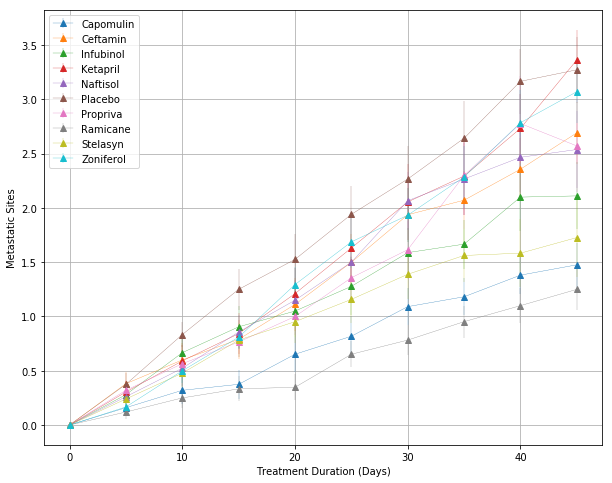

In [18]:
try:
    avg_met.insert(3, "Metastatic Sites (Standard Error)", sems)
except:
    print("The 'avg_met' DataFrame already has a 'Standard Error' column.")

# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,8))

for drug in drugs:
    avg_met_while_on_drug = avg_met[avg_met.Drug == drug]
    plt.errorbar(
        avg_met_while_on_drug["Timepoint"]
        , avg_met_while_on_drug["Metastatic Sites (Average)"]
        , yerr=avg_met_while_on_drug["Metastatic Sites (Standard Error)"]
        , linewidth=linewidth
        , marker=marker
    )

plt.grid(True)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(avg_met.Drug.unique(), loc="upper left")

# Save the Figure
plt.savefig("../presentation/2.png")

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = mice_trials_by_drug_and_timepoint\
    .count()\
    .reset_index()["Mouse ID"]

# Convert to DataFrame
mice_survival_over_time_df = pd.DataFrame(
    {
        "Drug": drug_samples
        , "Timepoint": timepoints
        , "Mice": mice
    }
)

In [20]:
# Minor Data Munging to Re-Format the Data Frames
mice_survival_over_time_df_pivot = pd.pivot_table(
    mice_survival_over_time_df
    , values="Mice"
    , index="Timepoint"
    , columns="Drug"
)

## Survival Rates

In [21]:
# Preview DataFrame
mice_survival_over_time_df.head()

,Drug,Timepoint,Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [22]:
# Preview pivoted DataFrame
mice_survival_over_time_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


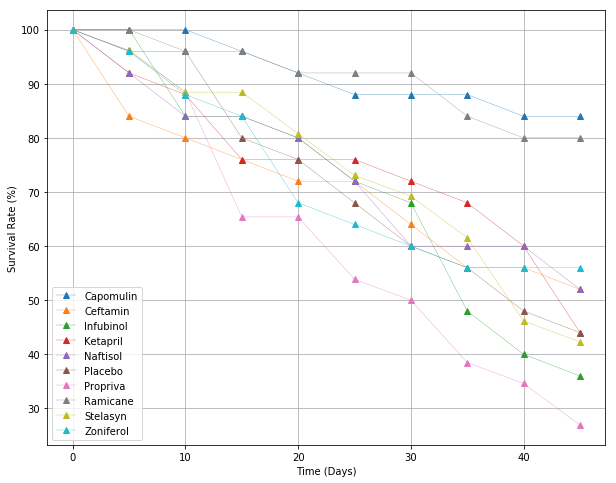

In [23]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(10,8))

for drug in drugs:
    starting_number_of_mice = mice_survival_over_time_df_pivot[drug][0]
    plt.plot(
        100 * mice_survival_over_time_df_pivot[drug] / starting_number_of_mice
        , linewidth=linewidth
        , marker=marker)

plt.grid(True)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(avg_met.Drug.unique(), loc="lower left")

# Save the Figure
plt.savefig("../presentation/3.png")

# Show the Figure
plt.show()

In [24]:
percentage_change_list = []

# Calculate the percent changes for each drug and display data
print("Drug")
for drug in drugs:
    averages_list = list(avg_tumor_volume[(avg_tumor_volume.Drug == drug)]["Average Tumor Volume (mm3)"])
    percentage_change = 100 * (averages_list[-1] - averages_list[0]) / averages_list[0]
    print(drug, "  ", percentage_change)
    percentage_change_list.append(percentage_change)
    
# Store all relevant percent changes into a Tuple
tumor_volume_change_tup = tuple(percentage_change_list)

Drug
Capomulin    -19.47530266789416
Ceftamin    42.516491855897414
Infubinol    46.123471727851836
Ketapril    57.02879468660604
Naftisol    53.92334713476919
Placebo    51.29796048315153
Propriva    47.24117486320634
Ramicane    -22.32090046276666
Stelasyn    52.085134287898995
Zoniferol    46.57975086509522


## Summary Bar Graph

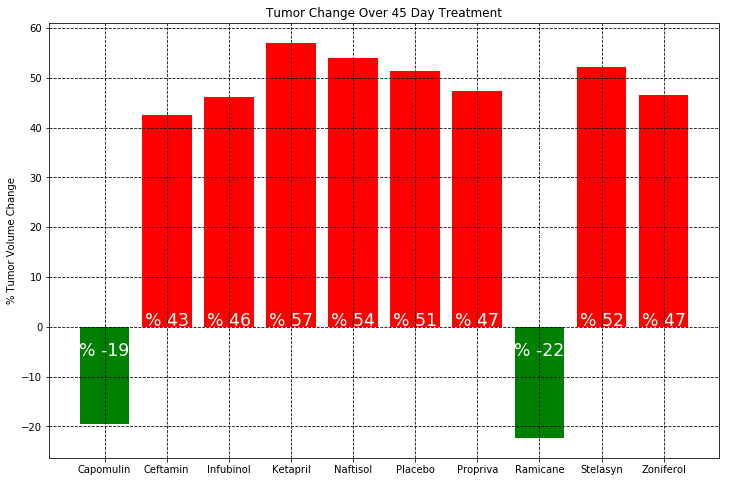

In [25]:
plt.figure(figsize=(12,8))
plt.bar(
    avg_met.Drug.unique()
    , tumor_volume_change_tup
    , color=["g","r", "r", "r", "r", "r", "r", "g", "r", "r"]
)
plt.grid(True, color="black", linestyle="dashed")
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

def plot_tumor_volume_change_text(tup):
    for i in range(len(tup)):
        if tup[i] > 0:
            x = i
            label = "% " + str(round(tup[i]))
            plt.text(x, 3, label, ha='center', va='top', color="white", fontsize="xx-large")
        else:
            x = i
            label = "% " + str(round(tup[i]))
            plt.text(x, -3, label, ha='center', va='top', color="white", fontsize="xx-large")
            
plot_tumor_volume_change_text(tumor_volume_change_tup)

# Save the Figure
plt.savefig("../presentation/4.png")